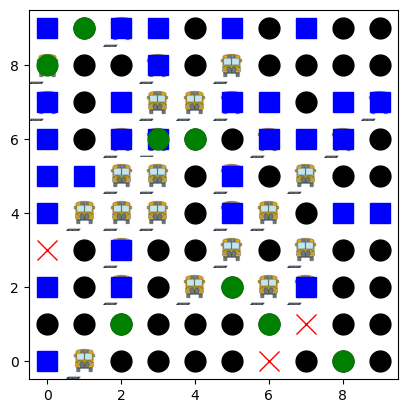

Passenger 1:
  Foot Steps = 2 steps
  Vehicle Steps = 1 steps
Passenger 2:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 3:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 4:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 5:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 6:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps
Passenger 7:
  Foot Steps = 1 steps
  Vehicle Steps = 0 steps
Passenger 8:
  Foot Steps = 3 steps
  Vehicle Steps = 0 steps


In [2]:
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output


class City:
    def __init__(self, size):
        self.size = size
        self.roads = [[0] * size for _ in range(size)]
        self.bus_stops = [(random.randint(0, size - 1), random.randint(0, size - 1)) for _ in range(40)]
        self.inaccessible_routes = set()


class PublicTransportVehicle:
    def __init__(self, route,position, inaccessible_routes):
        self.route = route
        self.next_stop = 0
        self.position = position
        self.inaccessible_routes = inaccessible_routes
        self.passengers=[]

    def move(self,city, num_positions_to_move):
        for _ in range(num_positions_to_move):
            if self.position!=self.route[self.next_stop]:
                       # Calculate the direction towards the destination
                delta_x = self.route[self.next_stop][0] - self.position[0]
                delta_y = self.route[self.next_stop][1] - self.position[1]

                # Move towards the destination or find an alternative route
                new_x, new_y = self.position[0], self.position[1]
                if delta_x != 0:
                    new_x += delta_x // abs(delta_x)
                elif delta_y != 0:
                    new_y += delta_y // abs(delta_y)

                # Check if the new position is within the city grid and accessible
                if 0 <= new_x < city.size and 0 <= new_y < city.size and (new_x, new_y) not in self.inaccessible_routes:
                    self.position = (new_x, new_y)
                else:
                    alternative_positions = [(x, y) for x in range(self.position[0]- 1, self.position[0]+ 2)
                                             for y in range(self.position[1]- 1,self.position[1] + 2)
                                             if 0 <= x < city.size and 0 <= y < city.size and (x, y) not in self.inaccessible_routes]
                    if alternative_positions:
                        self.position = random.choice(alternative_positions)
            else:
                self.next_stop = (self.next_stop + 1) % len(self.route)
                break
        
        

class Passenger:
    def __init__(self, origin, destination, inaccessible_routes):
        self.origin = origin
        self.destination = destination
        self.position = origin
        self.inaccessible_routes = inaccessible_routes
        self.BusTaken = False
        self.BusStartPosition=(-1,-1)
        self.Bus= None
        self.foot_steps = 0
        self.vehicle_steps = 0

    def move(self, city,vehicles, take_public_transport_probability=0.5):
        if self.position == self.destination:
            return  # Passenger has reached the destination, no need to move further

        current_x, current_y = self.position
        dest_x, dest_y = self.destination
        
        if self.BusTaken == True:
            self.vehicle_steps += 1
            return
        
        # Check if the passenger is on a bus stop
        if self.position in city.bus_stops:
            # Check if the passenger should take public transport
            matching_vehicles = [vehicle for vehicle in vehicles if (self.destination in vehicle.route) and (self.position==vehicle.position)]
            if matching_vehicles: #and random.random() < take_public_transport_probability:
                vehicle = random.choice(matching_vehicles)
                self.BusTaken = True
                self.Bus = vehicle
                #self.position = vehicle.position
                self.vehicle_steps += 1
                return  # Skip the walking part if taking public transport
        # Calculate the direction towards the destination
        delta_x = dest_x - current_x
        delta_y = dest_y - current_y
        
        self.foot_steps += 1
        
        # Move towards the destination or find an alternative route
        new_x, new_y = current_x, current_y
        if delta_x != 0:
            new_x += delta_x // abs(delta_x)
        elif delta_y != 0:
            new_y += delta_y // abs(delta_y)

        # Check if the new position is within the city grid and accessible if not find alternativeeee
        if 0 <= new_x < city.size and 0 <= new_y < city.size and (new_x, new_y) not in self.inaccessible_routes:
            self.position = (new_x, new_y)
        else:
            alternative_positions = [(x, y) for x in range(current_x - 1, current_x + 2)
                                     for y in range(current_y - 1, current_y + 2)
                                     if 0 <= x < city.size and 0 <= y < city.size and (x, y) not in self.inaccessible_routes]
            if alternative_positions:
                self.position = random.choice(alternative_positions)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_city(city, vehicles, passengers, vehicle_image_path="C:/Users/anisb/OneDrive/Desktop/bus.jpg"):
    plt.cla()  # Clear the current axes

    # Plot roads
    for i in range(city.size):
        for j in range(city.size):
            if (i, j) in city.bus_stops:
                plt.plot(i, j, 'bs', markersize=15)  # Blue square for bus stops
                if (i, j) in city.inaccessible_routes:
                    plt.plot(i, j, 'rx', markersize=15)  # Red 'X' for inaccessible routes
            elif (i, j) in city.inaccessible_routes:
                plt.plot(i, j, 'rx', markersize=15)  # Red 'X' for inaccessible routes
            elif any((vehicle.position == (i, j)) for vehicle in vehicles):
                pass
            else:
                plt.plot(i, j, 'ko', markersize=15)  # Black circle for roads

    # Plot vehicles
    vehicle_img = mpimg.imread(vehicle_image_path)
    for vehicle in vehicles:
        plt.imshow(vehicle_img, extent=(vehicle.position[0] - 0.5, vehicle.position[0] + 0.5,
                                       vehicle.position[1] - 0.5, vehicle.position[1] + 0.5))

    # Plot passengers
    for passenger in passengers:
        plt.plot(passenger.position[0], passenger.position[1], 'go', markersize=15)  # Green circle for passengers

    plt.draw()
    plt.pause(4)  # Pause to allow time for the plot to update

def simulate(city_size, num_vehicles, num_passengers, num_steps):
    city = City(city_size)
    # Create vehicles with random routes and timetable
    vehicles = []
    for _ in range(num_vehicles):
        start_stop = random.choice(city.bus_stops)
        timetable = random.sample(city.bus_stops, len(city.bus_stops))
        vehicle = PublicTransportVehicle(route= timetable, position=start_stop,
                                         inaccessible_routes=city.inaccessible_routes)
        vehicles.append(vehicle)

    # Create passengers with random origins and destinations
    passengers = [Passenger(
        (random.randint(0, city_size - 1), random.randint(0, city_size - 1)),
        (random.randint(0, city_size - 1), random.randint(0, city_size - 1)),
        city.inaccessible_routes
    ) for _ in range(num_passengers)]

    for step in range(num_steps):
        clear_output(wait=True)
        if step != num_steps-1:
            for i, passenger in enumerate(passengers):
                print(f"Passenger {i + 1}:")
                print(f"  Foot Steps = {passenger.foot_steps} steps")
                print(f"  Vehicle Steps = {passenger.vehicle_steps} steps")
        # Introduce disturbances by blocking some roads
        blocked_route = (random.randint(0, city_size - 1), random.randint(0, city_size - 1))
        city.inaccessible_routes.add(blocked_route)

        # Move vehicles
        for vehicle in vehicles:
            num_positions_to_move = random.randint(1, 4)
            vehicle.move(city,num_positions_to_move)
            for passenger in vehicle.passengers:
                passenger.position=vehicle.position
                for p in passengers:
                    if p == passenger:
                        p.position=passenger.position
                if passenger.position== passenger.destination:
                    vehicle.passengers.remove(passenger)

        # Update passenger positions based on their individual move method
        for passenger in passengers:
            passenger.move(city,vehicles)
            if passenger.BusTaken == True:
                for vehicle in vehicles:
                    if (vehicle.route == passenger.Bus.route) and (passenger.BusStartPosition==(-1,-1)):
                        vehicle.passengers.append(passenger)
                        passenger.BusStartPosition=passenger.position
        plot_city(city, vehicles, passengers)  # Remove plt.gca() from the arguments
    
        for i, passenger in enumerate(passengers):
            print(f"Passenger {i + 1}:")
            print(f"  Foot Steps = {passenger.foot_steps} steps")
            print(f"  Vehicle Steps = {passenger.vehicle_steps} steps")

# Example usage
simulate(city_size=10, num_vehicles=40, num_passengers=8, num_steps=3)
